# Evaluate Molecular Generation Results

In [ ]:
#ssh -L 8090:localhost:8090 node854

In [ ]:
!conda env list

## compare the of csv and hdf files

In [1]:
csv_path = "<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_known_ligands/ZINC_BB_Q99685_papyrus_known_ligands_cleaned.csv"

# load csv but dont read the trees column with pandas
import pandas 
csv_result = pandas.read_csv(csv_path, usecols = ["target","search_time","first_solution_time","first_solution_iteration","number_of_nodes","max_transforms","max_children","number_of_routes","number_of_solved_routes","top_score","is_solved","number_of_steps","number_of_precursors","number_of_precursors_in_stock","precursors_in_stock","precursors_not_in_stock","precursors_availability","policy_used_counts","profiling","top_scores"])
csv_result.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,is_solved,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores
0,O=C(Cc1ccc(Cc2ccccc2)cc1)OCC1CO1,2.788758,2.788680,1,5,4,1,1,1,0.975000,True,4,3,3,"O=C(O)Cc1ccc(Cc2ccccc2)cc1, OCc1ccccc1, OC(CCl...",NaN,zinc;zinc;zinc,{'uspto': 4},"{'expansion_calls': 4, 'reactants_generations'...","0.9750, 0.6699, 0.5226, 0.5190, 0.0491"
1,CCCCCCCCCC(=NO)c1cc(-c2ccc(OC)cc2)ccc1O,0.772956,0.772769,1,6,3,2,2,1,0.986553,True,3,4,4,"COc1ccc(Br)cc1, CCCCCCCCCC(=O)O, OB(O)c1ccc(O)...",NaN,zinc;zinc;zinc;zinc,{'uspto': 5},"{'expansion_calls': 4, 'reactants_generations'...","0.9866, 0.7491, 0.3607, 0.3607, 0.0491"
2,O=C1C=CC(=O)N1c1ccccc1I,0.092533,0.092464,1,2,1,1,1,1,0.997629,True,1,2,2,"Nc1ccccc1I, O=C1C=CC(=O)O1",NaN,zinc;zinc,{'uspto': 1},"{'expansion_calls': 1, 'reactants_generations'...","0.9976, 0.0491"
3,O=C1C=CC(=O)N1c1ccccc1-c1ccccc1,0.217136,0.217066,1,4,2,2,2,1,0.994040,True,2,3,3,"OB(O)c1ccccc1, Nc1ccccc1Br, O=C1C=CC(=O)O1",NaN,zinc;zinc;zinc,{'uspto': 3},"{'expansion_calls': 2, 'reactants_generations'...","0.9940, 0.5226, 0.5226, 0.0491"
4,O=C1CCC(COC(=O)N2CCC(COc3ccc(F)cc3Cl)CC2)N1,166.407636,166.407562,73,830,10,20,74,1,0.963447,True,5,5,5,"Fc1ccc(OCC2CCNCC2)c(Cl)c1, O=C(n1ccnc1)n1ccnc1...",NaN,zinc;zinc;zinc;zinc;zinc,{'uspto': 829},"{'expansion_calls': 756, 'reactants_generation...","0.9634, 0.8316, 0.8152, 0.8146, 0.8146, 0.8146..."


In [2]:
from multiretro.utils.io import DataReader

from typing import List

def load_values(paths: List[str], key: str = "table"):
    joined_df = None
    for path in paths:
        data_hdf = DataReader.load_hdf(path, key= key)
        if joined_df is None:
            joined_df = data_hdf
        else:
            joined_df = joined_df.append(data_hdf)
            
        joined_df.reset_index(drop=True, inplace=True)
    print(joined_df.columns)
    return joined_df

In [3]:
result_hdf_path = ["<PATH>/led3_score/3_molecular_generation/2_evaluate_molecules/full_model/zinc_building_blocks/Q99685_known_ligands/ZINC_BB_Q99685_papyrus_known_ligands_cleaned.csv.hdf"]
hdf_results = load_values(result_hdf_path)
hdf_results.head()

Index(['index', 'target', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees'],
      dtype='object')


,index,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,0,O=C(Cc1ccc(Cc2ccccc2)cc1)OCC1CO1,2.788758,2.788680,1,5,4,1,1,1,...,4,3,3,"O=C(O)Cc1ccc(Cc2ccccc2)cc1, OCc1ccccc1, OC(CCl...",,zinc;zinc;zinc,{'uspto': 4},"{'expansion_calls': 4, 'reactants_generations'...","0.9750, 0.6699, 0.5226, 0.5190, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
1,1,CCCCCCCCCC(=NO)c1cc(-c2ccc(OC)cc2)ccc1O,0.772956,0.772769,1,6,3,2,2,1,...,3,4,4,"COc1ccc(Br)cc1, CCCCCCCCCC(=O)O, OB(O)c1ccc(O)...",,zinc;zinc;zinc;zinc,{'uspto': 5},"{'expansion_calls': 4, 'reactants_generations'...","0.9866, 0.7491, 0.3607, 0.3607, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'CCC..."
2,2,O=C1C=CC(=O)N1c1ccccc1I,0.092533,0.092464,1,2,1,1,1,1,...,1,2,2,"Nc1ccccc1I, O=C1C=CC(=O)O1",,zinc;zinc,{'uspto': 1},"{'expansion_calls': 1, 'reactants_generations'...","0.9976, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,3,O=C1C=CC(=O)N1c1ccccc1-c1ccccc1,0.217136,0.217066,1,4,2,2,2,1,...,2,3,3,"OB(O)c1ccccc1, Nc1ccccc1Br, O=C1C=CC(=O)O1",,zinc;zinc;zinc,{'uspto': 3},"{'expansion_calls': 2, 'reactants_generations'...","0.9940, 0.5226, 0.5226, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
4,4,O=C1CCC(COC(=O)N2CCC(COc3ccc(F)cc3Cl)CC2)N1,166.407636,166.407562,73,830,10,20,74,1,...,5,5,5,"Fc1ccc(OCC2CCNCC2)c(Cl)c1, O=C(n1ccnc1)n1ccnc1...",,zinc;zinc;zinc;zinc;zinc,{'uspto': 829},"{'expansion_calls': 756, 'reactants_generation...","0.9634, 0.8316, 0.8152, 0.8146, 0.8146, 0.8146...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


In [4]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == csv_result["target"]).all()
# drop index column because it is the batch index
hdf_results.drop(columns=["index"], inplace=True)
hdf_results.head()

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,O=C(Cc1ccc(Cc2ccccc2)cc1)OCC1CO1,2.788758,2.788680,1,5,4,1,1,1,0.975000,...,4,3,3,"O=C(O)Cc1ccc(Cc2ccccc2)cc1, OCc1ccccc1, OC(CCl...",,zinc;zinc;zinc,{'uspto': 4},"{'expansion_calls': 4, 'reactants_generations'...","0.9750, 0.6699, 0.5226, 0.5190, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
1,CCCCCCCCCC(=NO)c1cc(-c2ccc(OC)cc2)ccc1O,0.772956,0.772769,1,6,3,2,2,1,0.986553,...,3,4,4,"COc1ccc(Br)cc1, CCCCCCCCCC(=O)O, OB(O)c1ccc(O)...",,zinc;zinc;zinc;zinc,{'uspto': 5},"{'expansion_calls': 4, 'reactants_generations'...","0.9866, 0.7491, 0.3607, 0.3607, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'CCC..."
2,O=C1C=CC(=O)N1c1ccccc1I,0.092533,0.092464,1,2,1,1,1,1,0.997629,...,1,2,2,"Nc1ccccc1I, O=C1C=CC(=O)O1",,zinc;zinc,{'uspto': 1},"{'expansion_calls': 1, 'reactants_generations'...","0.9976, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,O=C1C=CC(=O)N1c1ccccc1-c1ccccc1,0.217136,0.217066,1,4,2,2,2,1,0.994040,...,2,3,3,"OB(O)c1ccccc1, Nc1ccccc1Br, O=C1C=CC(=O)O1",,zinc;zinc;zinc,{'uspto': 3},"{'expansion_calls': 2, 'reactants_generations'...","0.9940, 0.5226, 0.5226, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
4,O=C1CCC(COC(=O)N2CCC(COc3ccc(F)cc3Cl)CC2)N1,166.407636,166.407562,73,830,10,20,74,1,0.963447,...,5,5,5,"Fc1ccc(OCC2CCNCC2)c(Cl)c1, O=C(n1ccnc1)n1ccnc1...",,zinc;zinc;zinc;zinc;zinc,{'uspto': 829},"{'expansion_calls': 756, 'reactants_generation...","0.9634, 0.8316, 0.8152, 0.8146, 0.8146, 0.8146...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


## calculate results on full data

In [5]:
solved_molecules = csv_result[csv_result["is_solved"] == True]
len(solved_molecules)

569

In [6]:
azf_results = AiZynthfinderResults(hdf_results)
solvability = azf_results.calculate_solvability()
print("The solvability: ", solvability)

The solvability:  81.28571428571428


<AxesSubplot:>

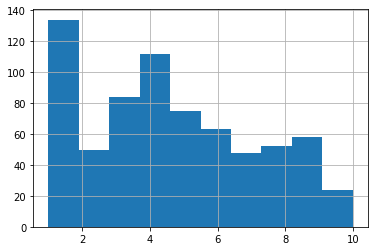

In [7]:
hdf_results["number_of_steps"].hist()

<AxesSubplot:>

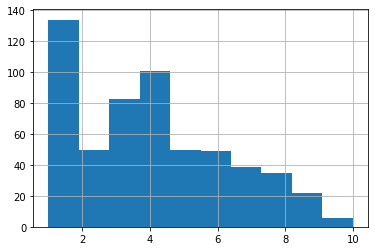

In [8]:
# get solved molecules
solved_molecules = hdf_results[hdf_results["is_solved"] == True]
solved_molecules["number_of_steps"].hist()

## calculate results on desired molecules

In [9]:
dataframe_with_values = "<PATH>/led3_score/data/chemical_datasets/target_datasets/Q99685_papyrus_known_ligands/Q99685_papyrus_known_ligands_cleaned.csv"
dataframe_with_values = pandas.read_csv(dataframe_with_values)
dataframe_with_values.head()

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,clean_smiles,clean_smiles_inchi_key
0,AADKPDGTJHDJAJ_on_Q99685_WT,High,ChEMBL31,ChEMBL31.compound.177735;ChEMBL31.compound.177...,O=C(Cc1ccc(Cc2ccccc2)cc1)OCC1CO1,AADKPDGTJHDJAJ,AADKPDGTJHDJAJ-UHFFFAOYSA-N,InChI=1S/C18H18O3/c19-18(21-13-17-12-20-17)11-...,"""AuxInfo=1/0/N:12,11,13,10,14,6,15,5,16,8,3,20...",Q99685_WT,...,=,5.62;4.8;4.4;4.81;5.61;5.62;4.8;4.4;4.81;5.61;...,5.048,0.498647,0.111501,20.0,4.81,0.41,O=C(Cc1ccc(Cc2ccccc2)cc1)OCC1CO1,AADKPDGTJHDJAJ-UHFFFAOYSA-N
1,AAVJAASROXWJAI_on_Q99685_WT,High,ChEMBL31,ChEMBL31.compound.399047,CCCCCCCCCC(=NO)c1c(O)ccc(-c2ccc(OC)cc2)c1,AAVJAASROXWJAI,AAVJAASROXWJAI-UHFFFAOYSA-N,InChI=1S/C23H31NO3/c1-3-4-5-6-7-8-9-10-22(24-2...,"""AuxInfo=1/0/N:1,24,2,3,4,5,6,7,8,9,20,26,17,2...",Q99685_WT,...,=,4.44;4.44,4.440,0.000000,0.000000,2.0,4.44,0.00,CCCCCCCCCC(=NO)c1cc(-c2ccc(OC)cc2)ccc1O,AAVJAASROXWJAI-UHFFFAOYSA-N
2,AAZGPNZTJLHQJM_on_Q99685_WT,High,ExCAPE-DB,599019;ChEMBL31.compound.123531;599019;ChEMBL3...,O=C1C=CC(=O)N1c1ccccc1I,AAZGPNZTJLHQJM,AAZGPNZTJLHQJM-UHFFFAOYSA-N,InChI=1S/C10H6INO2/c11-7-3-1-2-4-8(7)12-9(13)5...,"""AuxInfo=1/0/N:11,10,12,9,3,4,13,8,2,5,14,7,1,...",Q99685_WT,...,=,5.3;5.3;5.3;5.3;5.3;5.3;5.3;5.3,5.300,0.000000,0.000000,8.0,5.30,0.00,O=C1C=CC(=O)N1c1ccccc1I,AAZGPNZTJLHQJM-UHFFFAOYSA-N
3,ABAMRMYDBGTLHX_on_Q99685_WT,High,ChEMBL31,ChEMBL31.compound.123534,O=C1C=CC(=O)N1c1ccccc1-c1ccccc1,ABAMRMYDBGTLHX,ABAMRMYDBGTLHX-UHFFFAOYSA-N,InChI=1S/C16H11NO2/c18-15-10-11-16(19)17(15)14...,"""AuxInfo=1/0/N:17,16,18,11,10,15,19,12,9,3,4,1...",Q99685_WT,...,=,5.81;5.81;5.81;5.81,5.810,0.000000,0.000000,4.0,5.81,0.00,O=C1C=CC(=O)N1c1ccccc1-c1ccccc1,ABAMRMYDBGTLHX-UHFFFAOYSA-N
4,AGLVDKDFDZSFKB_on_Q99685_WT,High,ChEMBL31,ChEMBL31.compound.467736,O=C1CCC(COC(=O)N2CCC(COc3c(Cl)cc(F)cc3)CC2)N1,AGLVDKDFDZSFKB,AGLVDKDFDZSFKB-UHFFFAOYSA-N,InChI=1S/C18H22ClFN2O4/c19-15-9-13(20)1-3-16(1...,"""AuxInfo=1/1/N:22,4,23,3,12,24,11,25,19,14,6,1...",Q99685_WT,...,=,6.72;6.72,6.720,0.000000,0.000000,2.0,6.72,0.00,O=C1CCC(COC(=O)N2CCC(COc3ccc(F)cc3Cl)CC2)N1,AGLVDKDFDZSFKB-UHFFFAOYSA-N


In [12]:
dataframe_with_values.columns

Index(['Activity_ID', 'Quality', 'source', 'CID', 'SMILES', 'connectivity',
       'InChIKey', 'InChI', 'InChI_AuxInfo', 'target_id', 'TID', 'accession',
       'Protein_Type', 'AID', 'doc_id', 'Year', 'all_doc_ids', 'all_years',
       'type_IC50', 'type_EC50', 'type_KD', 'type_Ki', 'type_other',
       'Activity_class', 'relation', 'pchembl_value', 'pchembl_value_Mean',
       'pchembl_value_StdDev', 'pchembl_value_SEM', 'pchembl_value_N',
       'pchembl_value_Median', 'pchembl_value_MAD', 'clean_smiles',
       'clean_smiles_inchi_key'],
      dtype='object')

In [10]:
# assert that the target column is the same for azf_results and csv_result
assert (hdf_results["target"] == dataframe_with_values["clean_smiles"]).all(), "The target column and clean_smiles columns are not the same"

In [11]:
# get the differences between the target and clean smiles
hdf_results[hdf_results["target"] != dataframe_with_values["clean_smiles"]]

,target,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees


In [13]:
# rename target column to azf_target_smiles
hdf_results.rename(columns={"target": "azf_target_smiles"}, inplace=True)
hdf_results.head()

,azf_target_smiles,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,number_of_steps,number_of_precursors,number_of_precursors_in_stock,precursors_in_stock,precursors_not_in_stock,precursors_availability,policy_used_counts,profiling,top_scores,trees
0,O=C(Cc1ccc(Cc2ccccc2)cc1)OCC1CO1,2.788758,2.788680,1,5,4,1,1,1,0.975000,...,4,3,3,"O=C(O)Cc1ccc(Cc2ccccc2)cc1, OCc1ccccc1, OC(CCl...",,zinc;zinc;zinc,{'uspto': 4},"{'expansion_calls': 4, 'reactants_generations'...","0.9750, 0.6699, 0.5226, 0.5190, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
1,CCCCCCCCCC(=NO)c1cc(-c2ccc(OC)cc2)ccc1O,0.772956,0.772769,1,6,3,2,2,1,0.986553,...,3,4,4,"COc1ccc(Br)cc1, CCCCCCCCCC(=O)O, OB(O)c1ccc(O)...",,zinc;zinc;zinc;zinc,{'uspto': 5},"{'expansion_calls': 4, 'reactants_generations'...","0.9866, 0.7491, 0.3607, 0.3607, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'CCC..."
2,O=C1C=CC(=O)N1c1ccccc1I,0.092533,0.092464,1,2,1,1,1,1,0.997629,...,1,2,2,"Nc1ccccc1I, O=C1C=CC(=O)O1",,zinc;zinc,{'uspto': 1},"{'expansion_calls': 1, 'reactants_generations'...","0.9976, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
3,O=C1C=CC(=O)N1c1ccccc1-c1ccccc1,0.217136,0.217066,1,4,2,2,2,1,0.994040,...,2,3,3,"OB(O)c1ccccc1, Nc1ccccc1Br, O=C1C=CC(=O)O1",,zinc;zinc;zinc,{'uspto': 3},"{'expansion_calls': 2, 'reactants_generations'...","0.9940, 0.5226, 0.5226, 0.0491","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."
4,O=C1CCC(COC(=O)N2CCC(COc3ccc(F)cc3Cl)CC2)N1,166.407636,166.407562,73,830,10,20,74,1,0.963447,...,5,5,5,"Fc1ccc(OCC2CCNCC2)c(Cl)c1, O=C(n1ccnc1)n1ccnc1...",,zinc;zinc;zinc;zinc;zinc,{'uspto': 829},"{'expansion_calls': 756, 'reactants_generation...","0.9634, 0.8316, 0.8152, 0.8146, 0.8146, 0.8146...","[{'type': 'mol', 'hide': False, 'smiles': 'O=C..."


In [16]:
hdf_results.columns.isin(dataframe_with_values.columns)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [17]:
dataframe_with_values.columns.isin(hdf_results.columns)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [18]:
# add all dataframe_with_values columns to hdf_results
for column in dataframe_with_values.columns:
    hdf_results[column] = dataframe_with_values[column]

hdf_results.head()

,azf_target_smiles,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,clean_smiles,clean_smiles_inchi_key
0,O=C(Cc1ccc(Cc2ccccc2)cc1)OCC1CO1,2.788758,2.788680,1,5,4,1,1,1,0.975000,...,=,5.62;4.8;4.4;4.81;5.61;5.62;4.8;4.4;4.81;5.61;...,5.048,0.498647,0.111501,20.0,4.81,0.41,O=C(Cc1ccc(Cc2ccccc2)cc1)OCC1CO1,AADKPDGTJHDJAJ-UHFFFAOYSA-N
1,CCCCCCCCCC(=NO)c1cc(-c2ccc(OC)cc2)ccc1O,0.772956,0.772769,1,6,3,2,2,1,0.986553,...,=,4.44;4.44,4.440,0.000000,0.000000,2.0,4.44,0.00,CCCCCCCCCC(=NO)c1cc(-c2ccc(OC)cc2)ccc1O,AAVJAASROXWJAI-UHFFFAOYSA-N
2,O=C1C=CC(=O)N1c1ccccc1I,0.092533,0.092464,1,2,1,1,1,1,0.997629,...,=,5.3;5.3;5.3;5.3;5.3;5.3;5.3;5.3,5.300,0.000000,0.000000,8.0,5.30,0.00,O=C1C=CC(=O)N1c1ccccc1I,AAZGPNZTJLHQJM-UHFFFAOYSA-N
3,O=C1C=CC(=O)N1c1ccccc1-c1ccccc1,0.217136,0.217066,1,4,2,2,2,1,0.994040,...,=,5.81;5.81;5.81;5.81,5.810,0.000000,0.000000,4.0,5.81,0.00,O=C1C=CC(=O)N1c1ccccc1-c1ccccc1,ABAMRMYDBGTLHX-UHFFFAOYSA-N
4,O=C1CCC(COC(=O)N2CCC(COc3ccc(F)cc3Cl)CC2)N1,166.407636,166.407562,73,830,10,20,74,1,0.963447,...,=,6.72;6.72,6.720,0.000000,0.000000,2.0,6.72,0.00,O=C1CCC(COC(=O)N2CCC(COc3ccc(F)cc3Cl)CC2)N1,AGLVDKDFDZSFKB-UHFFFAOYSA-N


## clustering

In [ ]:
from multiretro.data.logic.fingerprints.fingerprints import BinaryMorganFingerprint
from multiretro.data.logic.fingerprints.fingerprint_generator import FingerprintGenerator
from multiretro.visualization.logic.umapVisualization import UmapVisualizer

# generate fingerprints
morganFingerprint = BinaryMorganFingerprint(transform_to_numpy_array=False, radius=2, number_of_bits= 1024, use_features= False)
fingerprint_generator = FingerprintGenerator(fingerprint = morganFingerprint)
clustered_azf_results = fingerprint_generator.create_fingerprints_pandas_dataframe(data_frame = hdf_results, smiles_column = "azf_target_smiles", fingerprint_column = "fingerprint")

umapVisualizer = UmapVisualizer(dataFrame=clustered_azf_results, dimensions=2)
umapVisualizer.transformRdkitColumn2NumpyArray(columnName="fingerprint", newColumnName="fingerprint_numpy_array")
umapVisualizer.transformNumpyArrayColumnn2NumpyMatrix(columnName="fingerprint_numpy_array")
umapVisualizer.calculateUmapMapper()
umapVisualizer.extractUmapEmbeddings()
#umapVisualizer.calculateMarkerSize(boolean_row = "Centroid")
umapDataFrame = umapVisualizer.getVisualizationDataFrame()
umapDataFrame = umapDataFrame.reset_index(drop = True)

# multiply the max_transforms by -1
umapDataFrame["number_of_steps_marker"] = umapDataFrame["number_of_steps"] * -1

# minmax scale the max_transforms_marker column
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 25))
umapDataFrame["number_of_steps_marker"] = scaler.fit_transform(umapDataFrame[["number_of_steps_marker"]])
umapDataFrame["real_index"] = umapDataFrame.index.to_list()

# visualize the molecules
#umapVisualizer = UmapVisualizer(dataFrame=umapDataFrame)
#app = umapVisualizer.createMolPlotlyVisualization(smilesColumn = 'target', maximumMarkerSize = 25, size = "number_of_steps_marker", colorColumn = "is_solved", captionColumns = ["real_index", "is_solved","target","number_of_steps","LED3Scorer","XGBClassifier","XGBRegressor"])
#app.run_server(mode='jupyterlab',host='0.0.0.0', port=8000, debug=False, proxy=None, use_reloader=False)


# On Alice: ssh -L 8000:localhost:8000 node802
# At Home: ssh -L 8000:localhost:8000 hpc1

In [20]:
print(umapDataFrame.columns)

umapDataFrame = umapDataFrame.drop(columns=['trees', 'fingerprint', 'fingerprint_numpy_array'])
print(len(umapDataFrame))
umapDataFrame.head()

Index(['azf_target_smiles', 'search_time', 'first_solution_time',
       'first_solution_iteration', 'number_of_nodes', 'max_transforms',
       'max_children', 'number_of_routes', 'number_of_solved_routes',
       'top_score', 'is_solved', 'number_of_steps', 'number_of_precursors',
       'number_of_precursors_in_stock', 'precursors_in_stock',
       'precursors_not_in_stock', 'precursors_availability',
       'policy_used_counts', 'profiling', 'top_scores', 'trees', 'Activity_ID',
       'Quality', 'source', 'CID', 'SMILES', 'connectivity', 'InChIKey',
       'InChI', 'InChI_AuxInfo', 'target_id', 'TID', 'accession',
       'Protein_Type', 'AID', 'doc_id', 'Year', 'all_doc_ids', 'all_years',
       'type_IC50', 'type_EC50', 'type_KD', 'type_Ki', 'type_other',
       'Activity_class', 'relation', 'pchembl_value', 'pchembl_value_Mean',
       'pchembl_value_StdDev', 'pchembl_value_SEM', 'pchembl_value_N',
       'pchembl_value_Median', 'pchembl_value_MAD', 'clean_smiles',
       'clean

,azf_target_smiles,search_time,first_solution_time,first_solution_iteration,number_of_nodes,max_transforms,max_children,number_of_routes,number_of_solved_routes,top_score,...,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD,clean_smiles,clean_smiles_inchi_key,x,y,number_of_steps_marker,real_index
0,O=C(Cc1ccc(Cc2ccccc2)cc1)OCC1CO1,2.788758,2.788680,1,5,4,1,1,1,0.975000,...,0.111501,20.0,4.81,0.41,O=C(Cc1ccc(Cc2ccccc2)cc1)OCC1CO1,AADKPDGTJHDJAJ-UHFFFAOYSA-N,1.982641,3.429419,18.333333,0
1,CCCCCCCCCC(=NO)c1cc(-c2ccc(OC)cc2)ccc1O,0.772956,0.772769,1,6,3,2,2,1,0.986553,...,0.000000,2.0,4.44,0.00,CCCCCCCCCC(=NO)c1cc(-c2ccc(OC)cc2)ccc1O,AAVJAASROXWJAI-UHFFFAOYSA-N,-9.245311,-1.185867,20.555556,1
2,O=C1C=CC(=O)N1c1ccccc1I,0.092533,0.092464,1,2,1,1,1,1,0.997629,...,0.000000,8.0,5.30,0.00,O=C1C=CC(=O)N1c1ccccc1I,AAZGPNZTJLHQJM-UHFFFAOYSA-N,-2.244598,4.500524,25.000000,2
3,O=C1C=CC(=O)N1c1ccccc1-c1ccccc1,0.217136,0.217066,1,4,2,2,2,1,0.994040,...,0.000000,4.0,5.81,0.00,O=C1C=CC(=O)N1c1ccccc1-c1ccccc1,ABAMRMYDBGTLHX-UHFFFAOYSA-N,-2.178477,4.551442,22.777778,3
4,O=C1CCC(COC(=O)N2CCC(COc3ccc(F)cc3Cl)CC2)N1,166.407636,166.407562,73,830,10,20,74,1,0.963447,...,0.000000,2.0,6.72,0.00,O=C1CCC(COC(=O)N2CCC(COc3ccc(F)cc3Cl)CC2)N1,AGLVDKDFDZSFKB-UHFFFAOYSA-N,18.573650,-3.887484,16.111111,4


In [21]:
save_path = "<PATH>/led3_score/data/results/3_molecular_generation/generated_molecules/full_model/target_data/planning_results/zinc_building_blocks/ZINC_BB_Q99685_papyrus_known_ligands_cleaned.csv"
#umapDataFrame.to_csv(save_path)